In [1]:
from ankipandas import Collection 
import pandas as pd
import os
my_coll=Collection()
print("gop")    
print(type(my_coll.cards))
my_coll.cards.to_csv("cards_data.csv", encoding="utf8")
my_coll.notes.to_csv("notes_data.csv",encoding="utf8")
my_coll.cards=my_coll.cards.merge_notes()
my_coll.cards.to_csv("cards_all_data.csv",encoding="utf8")
# my_coll.cards.
    

INFO: Searching for database. This might take some time. You can speed this up by specifying a search path or directly entering the path to your database.


gop
<class 'ankipandas.ankidf.AnkiDataFrame'>


                             cdeck   0_x   0_y
0                  daily knowledge  4271   8.0
1              Englisch Wortschatz  2617  84.0
2                            Kunst  1192   6.0
3   US States, Locations, Capitals   662   NaN
4                            Mathe   393   NaN
..                             ...   ...   ...
90                        Standard     2   NaN
91                       Parisisch     2   NaN
92                    MathePapers     2   NaN
93         Englisch Wortschatz Neu     2   NaN
94      japanischnichtjyoyokanjis     1   NaN

[95 rows x 3 columns]
                                                cdeck     ratio
12         japanischJapanisch - Shinjitai vs Chinese  8.247423
53            daily knowledgeAmpelregierung Minister  7.692308
51  daily knowledgeWir werden InformatikerShortc...  7.407407
61      daily knowledgeWir werden InformatikerExcel  6.666667
1                                 Englisch Wortschatz  3.209782
28     daily knowledgeWir we

c:\Users\juliu\anaconda3\envs\ankiaddon\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


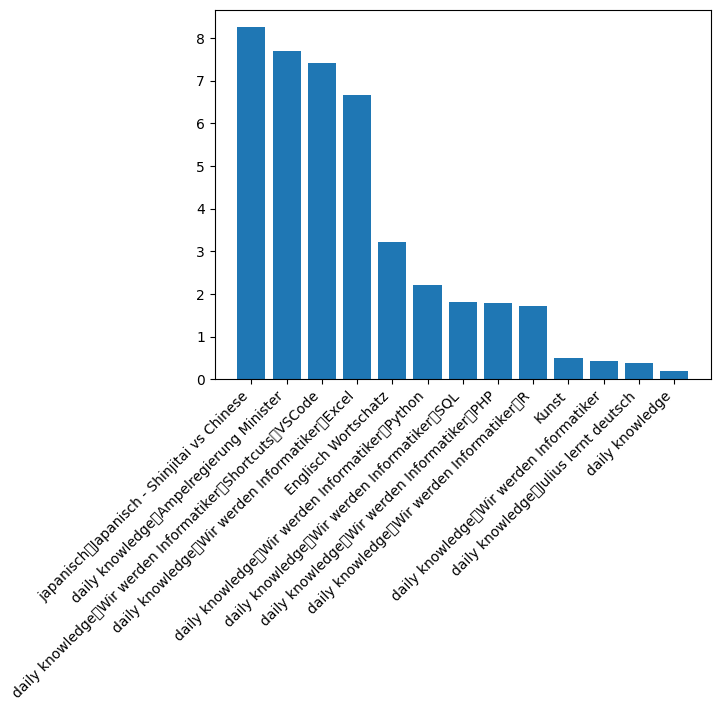

In [2]:
import matplotlib.pyplot as plt

df_cards = my_coll.cards.copy()

df_with_leeches = my_coll.cards[my_coll.cards.has_tag("leech")]

count_leeches_by_deck = df_with_leeches.value_counts("cdeck")
count_by_deck = df_cards.value_counts("cdeck")
count3 = df_cards

count_by_deck=count_by_deck.to_frame().reset_index()
count_leeches_by_deck=count_leeches_by_deck.to_frame().reset_index()

count_by_deck=count_by_deck.merge(count_leeches_by_deck,on="cdeck",how="left")
print(count_by_deck)
count_by_deck["ratio"]=count_by_deck["0_y"].div(count_by_deck["0_x"])*100
count_by_deck=count_by_deck.sort_values(by="ratio",ascending=False)
count_by_deck=count_by_deck[["cdeck","ratio"]]
count_by_deck=count_by_deck.dropna()
print(count_by_deck)

plt.bar(count_by_deck["cdeck"],count_by_deck["ratio"],)
plt.xticks(rotation=45, ha='right')
plt.show()


It seems to be the case, that I have some problems with the names of the current ministers of Germany
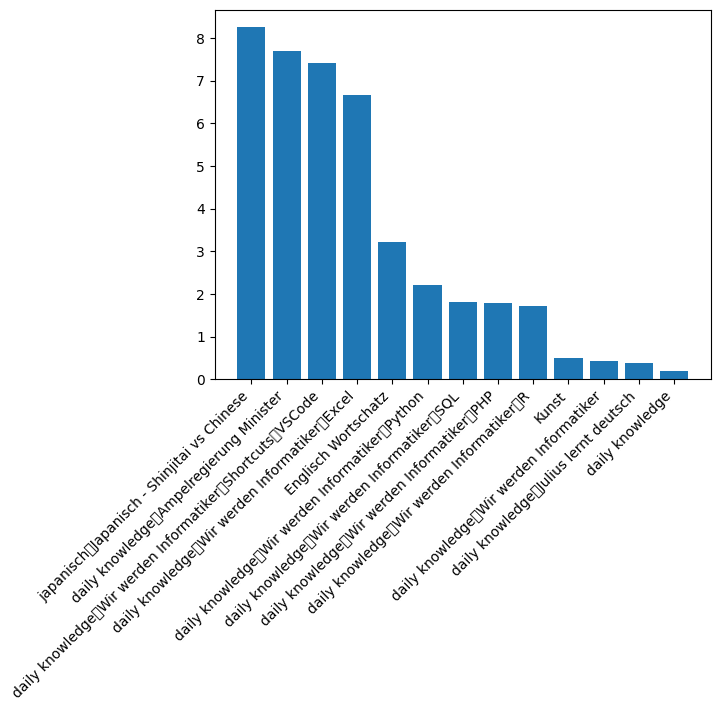

Let us take a look of various card types with respect to leeches.
We start with a plain analysis of card types in my current deck. We will only focus on the deck daily knowledge and subsidiaries

Index(['Lückentext', 'Cloze (overlapping)', 'Einfach (beide Richtungen)',
       'Einfach', 'Image Occlusion Enhanced', 'Lückentext+', 'Leute'],
      dtype='object', name='nmodel')


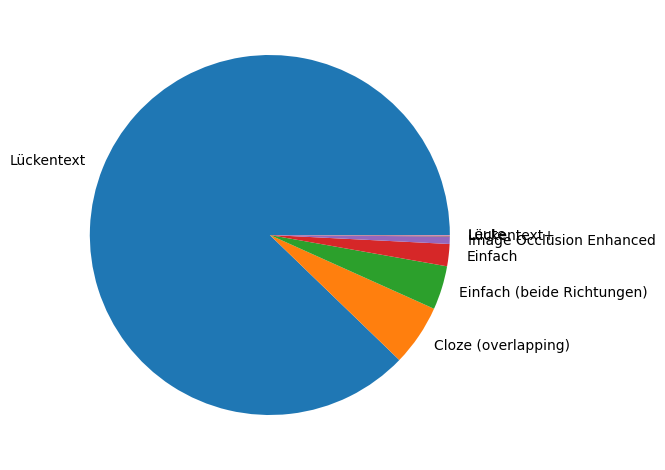

In [3]:
daily_knowledge=df_cards[df_cards["cdeck"]=="daily knowledge"].copy()
count_daily_knowledge=daily_knowledge.value_counts("nmodel")
count_daily_knowledge=count_daily_knowledge.to_frame()
plt.xticks(rotation=45, ha='right')
plt.pie(count_daily_knowledge[0],labels=count_daily_knowledge.index)
print(count_daily_knowledge.index)

plt.tight_layout()

plt.show()


A majority of my notetypes are clozes (in German Lückentext) - actually more than 75%
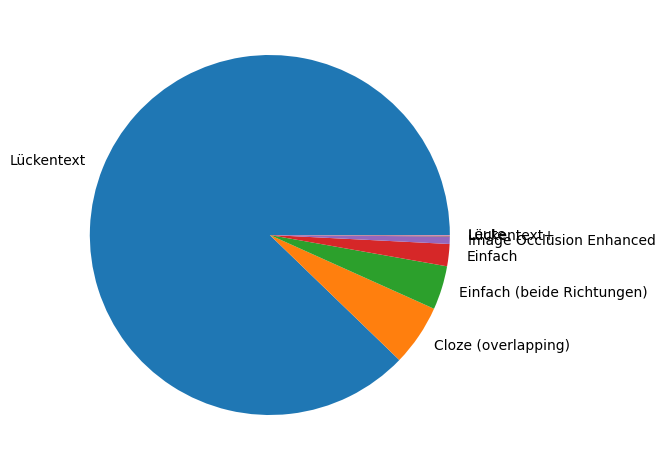

Let's see how it behaves if we just look at the cards with leeches:

Index(['Einfach (beide Richtungen)', 'Lückentext'], dtype='object', name='nmodel')


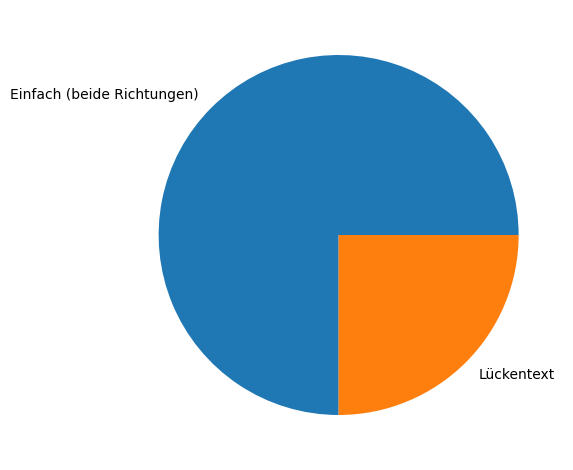

In [6]:
daily_knowledge_with_leeches=df_with_leeches[df_with_leeches["cdeck"]=="daily knowledge"]
count_daily_knowledge_with_leeches=daily_knowledge_with_leeches.value_counts("nmodel")
count_daily_knowledge_with_leeches=count_daily_knowledge_with_leeches.to_frame()
plt.xticks(rotation=45, ha='right')
plt.pie(count_daily_knowledge_with_leeches[0],labels=count_daily_knowledge_with_leeches.index)
print(count_daily_knowledge_with_leeches.index)

plt.tight_layout()

plt.show()


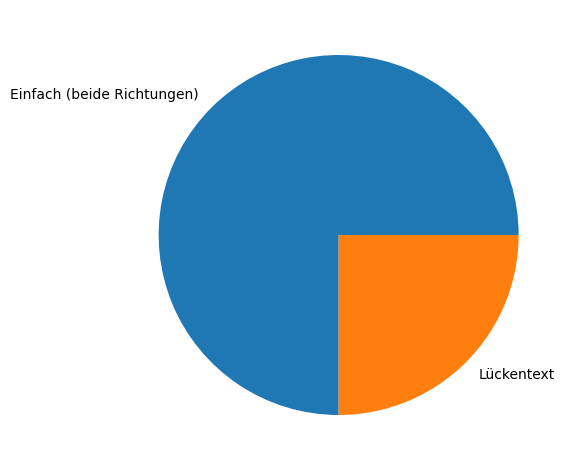

This paints a very different picture - although clozes contribute to more than 75% of all cards in my collection, they only contribute to around 25% of all leeches -> I should prefer clozes over other cards

Let us dive now into a bit more details with the help of seaborn

In [2]:
import seaborn as sns

